# Naive Bayes for Flower Recognition

## Yanling Wu (yw996)
In this assignment, you will be asked to implement Gaussian Naive Bayes by yourself (sci-kit learn is not allowed) and use it classify what kind of iris flower the sample is given its features listed below:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

There are three kinds of flowers: Iris Setosa, Iris Versicolour and Iris Virginica.
The data we get comes from [Kaggle: Iris Dataset Visualization and Machine Learning](https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning). Make sure you have installed pandas, numpy and seaborn before running the script.
```bash
    conda install pandas numpy seaborn
```
or

```bash
    pip3 install pandas numpy seaborn
```
The following code loads the data and the dataset looks like the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
iris = pd.read_csv('iris_data.txt', header=None) #read dataset
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'] # rename each column
iris_visual = shuffle(iris, random_state = 0) # shuffle the dataset
iris_visual.head(10) #print the top ten entries

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Visualization of the dataset.
The following code visualize the distribution of each pair of the features within each class. (Diagnals are probability density function for each feature).

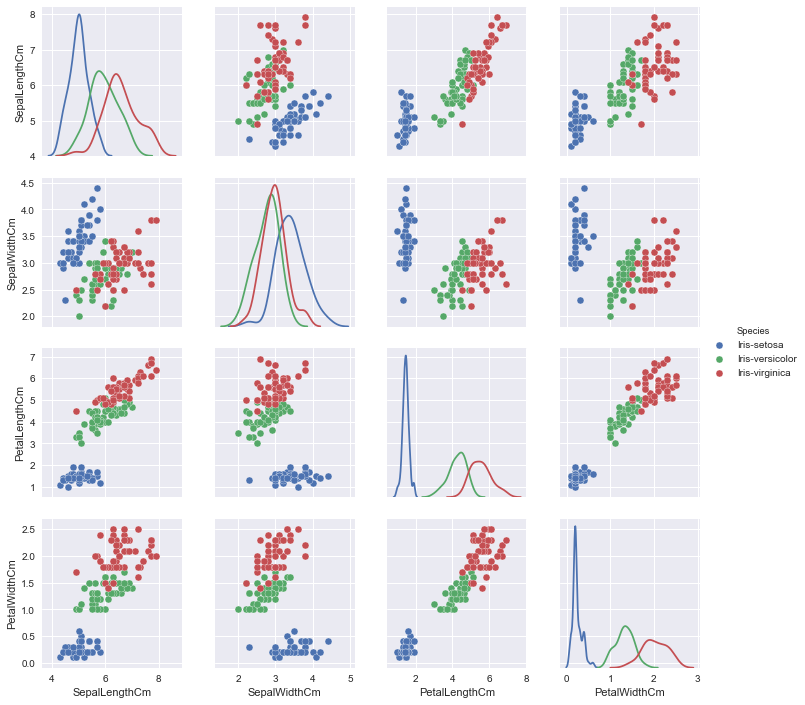

In [30]:
import seaborn as sns
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde")

## Data splitting
Next, we split the data into training and testing sets according to 60/40 rule. 

In [4]:
from sklearn.model_selection import train_test_split
iris_data = np.array(iris)
X_trn, X_tst, y_trn, y_tst = train_test_split(iris_data[:,0:4], iris_data[:,4], test_size = 0.4, random_state = 0) # split the dataset into training and testing sets

# Problem 1 Write your own Gaussian Naive Bayes code
Using the skeleton provided below, write your own code for learning and inference using Gaussian Naive Bayes model. You can use the skeleton provided in the second problem to verify whether you are writing it correctly. Reading through chapter 1.9.1 in the following link and the slide from last year can be useful:
https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.dropbox.com/s/6d5h6fig1fj44e4/Naive_Bayes.pdf?dl=0

In [26]:
from math import pi,e

def gnb_train(X, y, output_label):
    output_size = len(output_label)
    prior = np.zeros(output_size)
    mean = np.zeros((output_size, X.shape[1]))
    std = np.zeros((output_size, X.shape[1]))
# ======= Your Code Here =======

    size = len(y)
    ## calculate the prior
    for i in range(output_size):
        for j in range(size): 
            if y[j] is output_label[i]:
                prior[i] += 1.
    
    ## calculate the mean    
    for i in range(X.shape[1]):
        for j in range(output_size):
            avg = 0.0
            for k in range(size):
                if y[k] is output_label[j]:
                    avg += float(X[k][i])
            mean[j][i] = avg / prior[j]
            
    ##calculate the std
    for i in range(X.shape[1]):
        for j in range(output_size):
            temp = 0.0
            for k in range(size):
                if y[k] is output_label[j]:
                    temp += (float(X[k][i]) - mean[j][i]) ** 2
            std[j][i] = (temp / prior[j]) ** 0.5
    prior /= size
    return prior, mean, std


def gnb_predict(X, prior, mean, std, output_label):
    predict = []
# ======= Your Code Here =======
    output_size = len(output_label)
    prob = np.ones(output_size)
    #
    for k in range(X.shape[0]):
        for j in range(output_size): 
            for i in range(X.shape[1]):
                variance = std[j][i] ** 2
                exp_squar_diff = (float(X[k][i]) - mean[j][i]) ** 2
                exp_power = -exp_squar_diff / (2 * variance)
                exp = e ** (exp_power)
                deno = ((2 * pi) ** 0.5) * std[j][i]
                normal_prob = exp / deno
                prob[j] *= normal_prob
                normal_prob = 1
            prob[j] *= prior[j]
        maxindex  = np.argmax(prob)
        prob = np.ones(output_size)
        predict.append(output_label[maxindex])
        
    return predict

# Problem 2: Inference on IRIS dataset
Using your own GNB functions, implementing Gaussian Naive Bayes algorithm for the first feature, the first two features, the first three features and the first four features. Output the error for each experiment and explain using the visualization of the dataset.

In [27]:
from sklearn.metrics import hamming_loss
output_label = list(set(y_trn))
for i in range(1,5):
    prior, mean, std = gnb_train(X_trn[:,0:i], y_trn, output_label)
    y_pred = gnb_predict(X_tst[:,0:i], prior, mean, std, output_label)
    error = hamming_loss(y_tst, y_pred)
    print("Test error using first", i, "features:",  error)

Test error using first 1 features: 0.36666666666666664
Test error using first 2 features: 0.31666666666666665
Test error using first 3 features: 0.18333333333333332
Test error using first 4 features: 0.06666666666666667


### Explaination: 
1. The test error decreases as the number of features that we use increases. This is reasonable. Because more features in certain range will give more information to classify the dataset. 
2. The very important point is that when using the first two features, the test error decrease a little bit but did not decrease too much comparing to the effect of adding the third and the fourth features. We can see something vital from the figures in visualization of the dataset. Only using the first, third, fourth feature, can it actually classify the species of IRIS because the three color curve lines in the one figure seperate larger than the figure that only use the second feature. That is, the second feature cannot classify the species very good. So that is why adding the second feature did not improve the performance hugely. 

### Problem 3: The Limitation of Naive Bayes
From the last feature, we can see the more features we use, we will get better performance. In this question, we show sometimes it is not the case. Repeat the first feature for $i = 1, 2, 3, ...., 300$ times and plot the testing error. Justify the plot. If we repeat the first
feature for infinitely many number of times, will the test accuracy become zero? If yes, explain why and if not, what would be your guess for the final error?

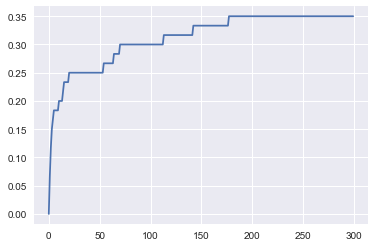

In [29]:
err = np.zeros(300)
for i in range(1,300):
    X_trn_new = np.hstack((X_trn, np.tile(X_trn[:, [0]], i)))
    X_tst_new = np.hstack((X_tst, np.tile(X_tst[:, [0]], i)))
    prior, mean, std = gnb_train(X_trn_new, y_trn, output_label)
    y_pred = gnb_predict(X_tst_new, prior, mean, std, output_label)
    err[i] = hamming_loss(y_tst, y_pred)
plt.plot(err)

### Explaination
At first, the test error is 0.06, close to zero when no repeated the first feature. But when repeating the first feature in the training set many times, the test error starts to increase and almost converge to around 0.35 in this figure. This is because when the number of data with the first feature increase, the effect of the first feature will increase and others' effect will decrease and the dataset becomes more similar to the dataset that only contains the first feature. So the error will increase to the result that get only using the first feature. So if we repeat the first feature for infinitely many number of times, the test error will converge to the 0.36666. 